<a href="https://colab.research.google.com/github/prachimodi-142/MachineLearning/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1: Histogram and Cross-Validation

a)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal

In [ ]:
mu = 0
sigma = 1
x = np.linspace(-3,3,100)
fx = (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-(x-mu)**2/(2*sigma**2))

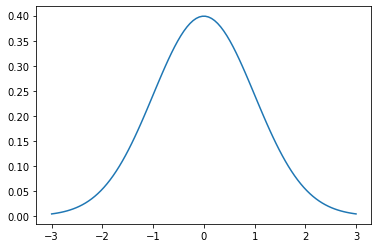

In [ ]:
plt.plot(x,fx)
plt.savefig('X_PDF.png')

b)

In [ ]:
mu = 0
sigma = 1
samples = np.random.normal(mu, sigma, 1000)

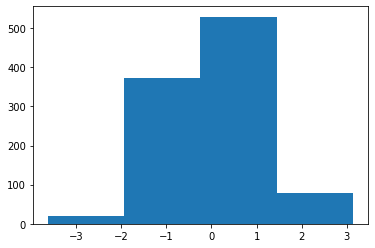

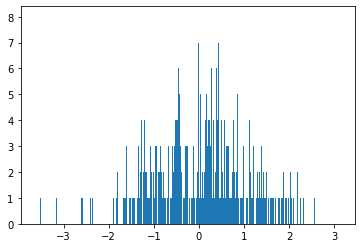

In [ ]:
# histogram with 4 bins
plt.hist(samples, bins=4)
plt.savefig('histogram_4bins.png')
plt.show()

# histogram with 1000 bins
plt.hist(samples, bins=1000)
plt.savefig('histogram_1000bins.png')
plt.show()

In [ ]:
mu_est, sigma_est = norm.fit(samples)

print(f'Estimated mean: {mu_est}')
print(f'Estimated standard deviation: {sigma_est}')


Estimated mean: 0.0329432181824067
Estimated standard deviation: 0.999725282863212


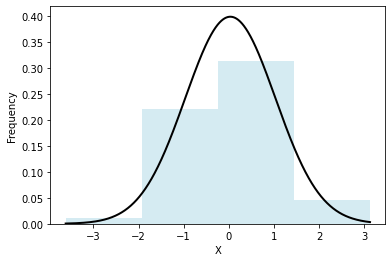

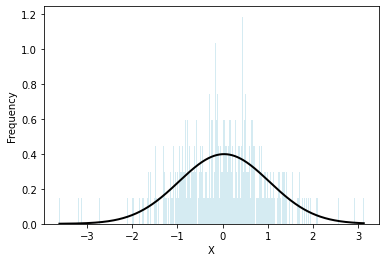

In [ ]:
# histogram with 4 bins
plt.hist(samples, bins=4, density=True, color='lightblue', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Frequency')
mu_est, sigma_est = norm.fit(samples)
x_fit = np.linspace(np.min(samples), np.max(samples), 1000)
pdf = norm.pdf(x_fit, mu_est, sigma_est)
plt.plot(x_fit, pdf, 'k', linewidth=2)
plt.savefig('histogram_4bins_gaussian_fit.png')
plt.show()

# histogram with 1000 bins
plt.hist(samples, bins=1000, density=True, color='lightblue', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Frequency')
mu_est, sigma_est = norm.fit(samples)
x_fit = np.linspace(np.min(samples), np.max(samples), 1000)
pdf = norm.pdf(x_fit, mu_est, sigma_est)
plt.plot(x_fit, pdf, 'k', linewidth=2)
plt.savefig('histogram_1000bins_gaussian_fit.png')
plt.show()


c)

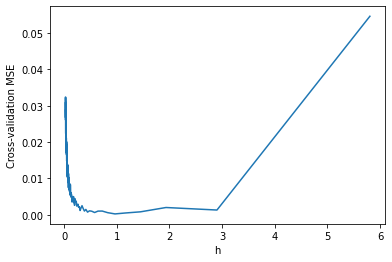

In [ ]:
# Generate the data
np.random.seed(0)
samples = np.random.normal(0, 1, 1000)

# split the data into training and validation sets
np.random.shuffle(samples)
train, val = samples[:800], samples[800:]

h_values = []
J_values = []

for m in range(1, 201):
    # calculate bin width
    h = (np.max(train) - np.min(train))/m
    h_values.append(h)
    # estimate PDF on the training set
    hist, bin_edges = np.histogram(train, bins=m, density=True)
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    mu_est, sigma_est = norm.fit(train)
    f_hat = norm.pdf(bin_centers, mu_est, sigma_est)
    # evaluate the histogram on the validation set
    hist_val, _ = np.histogram(val, bins=bin_edges, density=True)
    # calculate MSE
    J = np.mean((hist_val - f_hat)**2)
    J_values.append(J)

plt.plot(h_values, J_values)
plt.xlabel('h')
plt.ylabel('Cross-validation MSE')
plt.savefig('J_h_mse_cv.png')
plt.show()


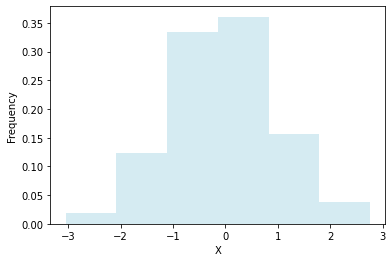

In [ ]:
# Generate the data
np.random.seed(0)
samples = np.random.normal(0, 1, 1000)

# split the data into training and validation sets
np.random.shuffle(samples)
train, val = samples[:800], samples[800:]

h_values = []
J_values = []

for m in range(1, 201):
    # calculate bin width
    h = (np.max(train) - np.min(train))/m
    h_values.append(h)
    # estimate PDF on the training set
    hist, bin_edges = np.histogram(train, bins=m, density=True)
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    mu_est, sigma_est = norm.fit(train)
    f_hat = norm.pdf(bin_centers, mu_est, sigma_est)
    # evaluate the histogram on the validation set
    hist_val, _ = np.histogram(val, bins=bin_edges, density=True)
    # calculate MSE
    J = np.mean((hist_val - f_hat)**2)
    J_values.append(J)

# find the number of bins that minimizes J(h)
best_m = np.argmin(J_values) + 1

# plot the histogram of the data with the best number of bins
plt.hist(samples, bins=best_m, density=True, color='lightblue', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.savefig('best_histogram_mse.png')
plt.show()


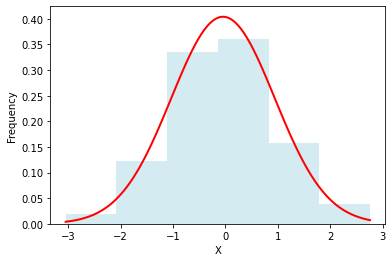

In [ ]:
# Generate the data
np.random.seed(0)
samples = np.random.normal(0, 1, 1000)

# split the data into training and validation sets
np.random.shuffle(samples)
train, val = samples[:800], samples[800:]

h_values = []
J_values = []

for m in range(1, 201):
    # calculate bin width
    h = (np.max(train) - np.min(train))/m
    h_values.append(h)
    # estimate PDF on the training set
    hist, bin_edges = np.histogram(train, bins=m, density=True)
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    mu_est, sigma_est = norm.fit(train)
    f_hat = norm.pdf(bin_centers, mu_est, sigma_est)
    # evaluate the histogram on the validation set
    hist_val, _ = np.histogram(val, bins=bin_edges, density=True)
    # calculate MSE
    J = np.mean((hist_val - f_hat)**2)
    J_values.append(J)

# find the number of bins that minimizes J(h)
best_m = np.argmin(J_values) + 1

# plot the histogram of the data with the best number of bins
plt.hist(samples, bins=best_m, density=True, color='lightblue', alpha=0.5)

# plot the Gaussian curve fitted to the data on top of the histogram
mu_est, sigma_est = norm.fit(samples)
x = np.linspace(np.min(samples), np.max(samples), 100)
plt.plot(x, norm.pdf(x, mu_est, sigma_est), 'r', lw=2)

plt.xlabel('X')
plt.ylabel('Frequency')
plt.savefig('best_histogram_gaussian_mse.png')
plt.show()


### Exercise 2: Gaussian Whitening

a)

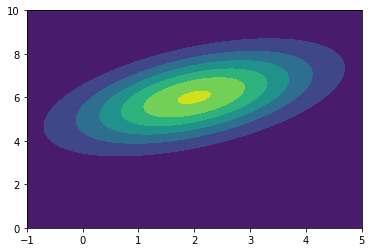

In [ ]:
# Define the mean vector and covariance matrix
mu = np.array([2, 6])
sigma = np.array([[2, 1], [1, 2]])

# Define the range for x
x = np.linspace(-1, 5, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Create an instance of the multivariate_normal class from scipy.stats
rv = multivariate_normal(mean=mu, cov=sigma)

# Compute the probability density function for the 2D Gaussian
Z = rv.pdf(np.dstack((X, Y)))

# Plot the contour
plt.contourf(X, Y, Z)
plt.show()


c)

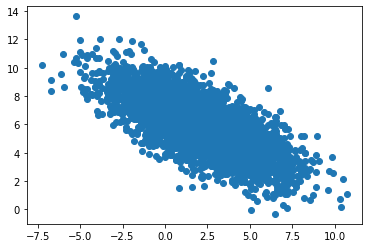

In [ ]:
# Draw 5000 random samples from the 2D standard normal distribution
mean = [0, 0]
cov = [[1, 0], [0, 1]]
X = np.random.multivariate_normal(mean, cov, 5000)

# Define the matrix A and vector b
A = np.array([[np.sqrt(3), -np.sqrt(3)], [0, np.sqrt(3)]])
b = np.array([2, 6])

# Apply the transformation
Y = np.dot(X, A.T) + b

# Plot the new data points
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()

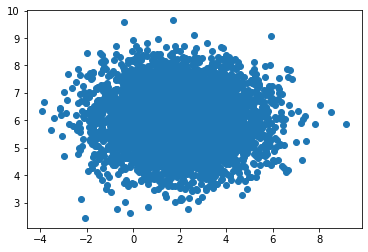

In [ ]:
# Draw 5000 random samples from the 2D standard normal distribution
mean = [0, 0]
cov = [[1, 0], [0, 1]]
X = np.random.multivariate_normal(mean, cov, 5000)

# Define the desired covariance matrix ΣY
SigmaY = np.array([[2, 1], [1, 2]])

# Obtain A using the eigen-decomposition
eig_val, eig_vec = np.linalg.eig(SigmaY)
A = eig_vec.dot(np.diag(np.sqrt(eig_val)))

# Define the vector b
b = np.array([2, 6])

# Apply the transformation
Y = np.dot(X, A) + b

# Plot the new data points
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()


## Exercise 3: Linear Regression

a)

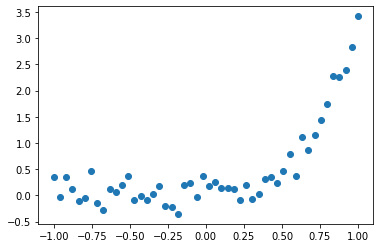

In [2]:
# parameters
beta0 = -0.001
beta1 = 0.01
beta2 = 0.55
beta3 = 1.5
beta4 = 1.2
sigma = 0.22

# x values
x = np.linspace(-1, 1, 50)

# y values
epsilon = np.random.normal(0, sigma, 50)
y = beta0 + beta1*x + beta2*x**2 + beta3*x**3 + beta4*x**4 + epsilon

# scatter plot
plt.scatter(x, y)
plt.show()

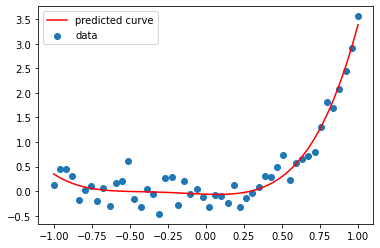

In [3]:
# parameters
beta0 = -0.001
beta1 = 0.01
beta2 = 0.55
beta3 = 1.5
beta4 = 1.2
sigma = 0.22

# x values
x = np.linspace(-1, 1, 50)

# y values
epsilon = np.random.normal(0, sigma, 50)
y = beta0 + beta1*x + beta2*x**2 + beta3*x**3 + beta4*x**4 + epsilon

# design matrix
X = np.column_stack([x**i for i in range(5)])

# coefficient estimates
beta_est, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

# predicted y values
y_pred = X @ beta_est

# scatter plot
plt.scatter(x, y, label='data')
plt.plot(x, y_pred, 'r', label='predicted curve')
plt.legend()
plt.show()


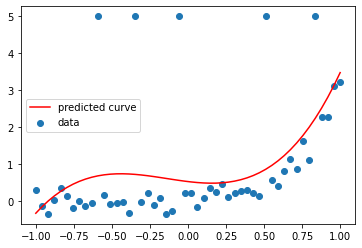

In [4]:
# parameters
beta0 = -0.001
beta1 = 0.01
beta2 = 0.55
beta3 = 1.5
beta4 = 1.2
sigma = 0.22

# x values
x = np.linspace(-1, 1, 50)

# y values
epsilon = np.random.normal(0, sigma, 50)
y = beta0 + beta1*x + beta2*x**2 + beta3*x**3 + beta4*x**4 + epsilon

# make outliers
idx = [10,16,23,37,45]    # these are the locations of the outliers
y[idx] = 5                # set the outliers to have a value 5

# design matrix
X = np.column_stack([x**i for i in range(5)])

# coefficient estimates
beta_est, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

# predicted y values
y_pred = X @ beta_est

# scatter plot
plt.scatter(x, y, label='data')
plt.plot(x, y_pred, 'r', label='predicted curve')
plt.legend()
plt.show()


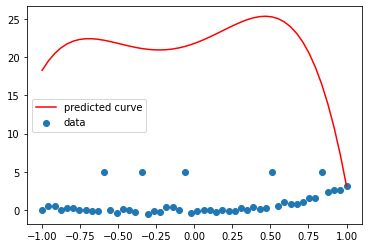

In [11]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

# parameters
beta0 = -0.001
beta1 = 0.01
beta2 = 0.55
beta3 = 1.5
beta4 = 1.2
sigma = 0.22

# x values
x = np.linspace(-1, 1, 50)

# y values
epsilon = np.random.normal(0, sigma, 50)
y = beta0 + beta1*x + beta2*x**2 + beta3*x**3 + beta4*x**4 + epsilon

# make 5 outlier points
idx = [10,16,23,37,45]    # these are the locations of the outliers
y[idx] = 5                # set the outliers to have a value 5

# design matrix
X = np.column_stack([x**i for i in range(5)])

# linear programming problem
c = np.ones(5)
A = -X
b = -y

# bounds = (None, None) to allow negative values
res = linprog(c, A_ub=A, b_ub=b, bounds=(None, None))
beta_est = res.x

# predicted y values
y_pred = X @ beta_est

# scatter plot
plt.scatter(x, y, label='data')
plt.plot(x, y_pred, 'r', label='predicted curve')
plt.legend()
plt.show()
